In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
# Reading raw data file
df = pd.read_csv('../data/heart_disease_data.csv', header=0)

In [18]:
# Data exploration
print(df.shape)

(920, 16)


In [19]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [20]:
# Obtaining data information and summary stats
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [35]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [22]:
# Checking for missing values
print(df.isnull().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64


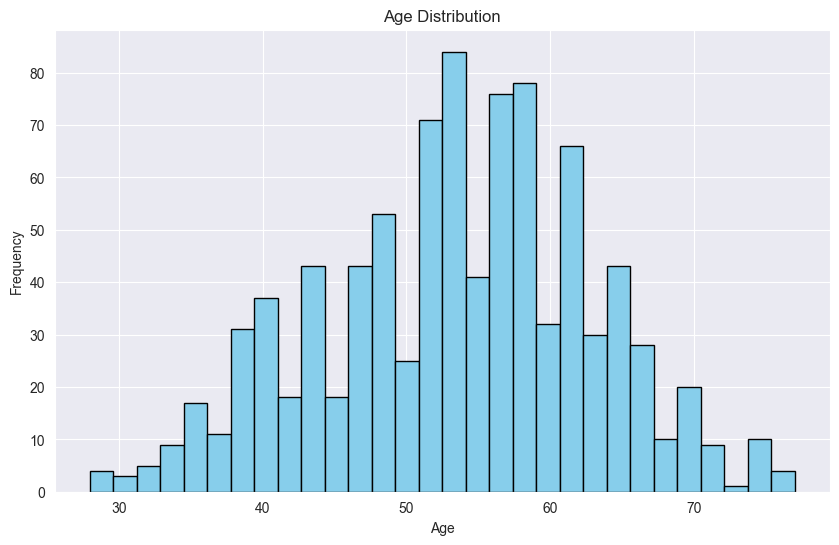

In [33]:
# Summary statistics for age
age_description = df['age'].describe()
print(age_description)

# Plotting the age distribution
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [39]:
for column in df.select_dtypes(include=['object']).columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print("\n")

Value counts for sex:
sex
Male      726
Female    194
Name: count, dtype: int64


Value counts for dataset:
dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64


Value counts for cp:
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64


Value counts for fbs:
fbs
False    692
True     138
Name: count, dtype: int64


Value counts for restecg:
restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64


Value counts for exang:
exang
False    528
True     337
Name: count, dtype: int64


Value counts for slope:
slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64


Value counts for thal:
thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64




<Axes: xlabel='cp', ylabel='count'>

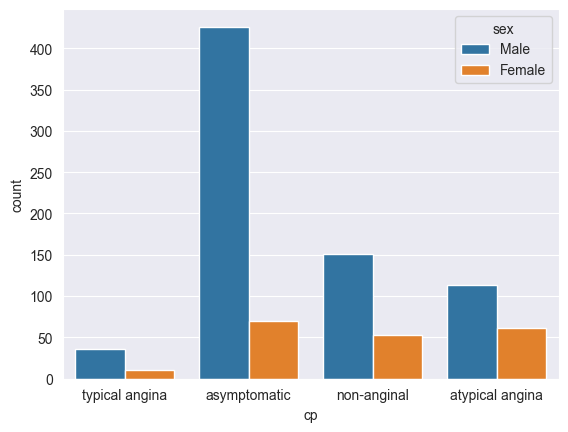

In [40]:
sns.countplot(df, x='cp', hue= 'sex')

In [59]:
cp_age_group = df.groupby(['cp', 'age_bracket'], observed=False).size().reset_index(name='count')

# Get the total count of each cp category
cp_totals = df['cp'].value_counts().reset_index()
cp_totals.columns = ['cp', 'total_count']

# Merge to calculate the percentage for each age bracket in each cp category
cp_age_group = cp_age_group.merge(cp_totals, on='cp')

# Calculate the percentage
cp_age_group['percentage'] = (cp_age_group['count'] / cp_age_group['total_count']) * 100

# Step 3: Sort by percentage for ranking within each cp category
cp_age_group_sorted = cp_age_group.sort_values(by=['cp', 'percentage'], ascending=[True, False])

# Step 4: Display the results
print(cp_age_group_sorted[['cp', 'age_bracket', 'percentage']])

                 cp age_bracket  percentage
3      asymptomatic       50-59   41.733871
4      asymptomatic       60-69   29.637097
2      asymptomatic       40-49   19.959677
1      asymptomatic       30-39    5.443548
5      asymptomatic       70-79    3.225806
0      asymptomatic       20-29    0.000000
9   atypical angina       50-59   43.103448
8   atypical angina       40-49   31.609195
7   atypical angina       30-39   13.218391
10  atypical angina       60-69    7.471264
6   atypical angina       20-29    2.298851
11  atypical angina       70-79    2.298851
15      non-anginal       50-59   39.705882
14      non-anginal       40-49   24.509804
16      non-anginal       60-69   21.078431
13      non-anginal       30-39    9.803922
17      non-anginal       70-79    4.901961
12      non-anginal       20-29    0.000000
22   typical angina       60-69   41.304348
21   typical angina       50-59   26.086957
20   typical angina       40-49   17.391304
19   typical angina       30-39 

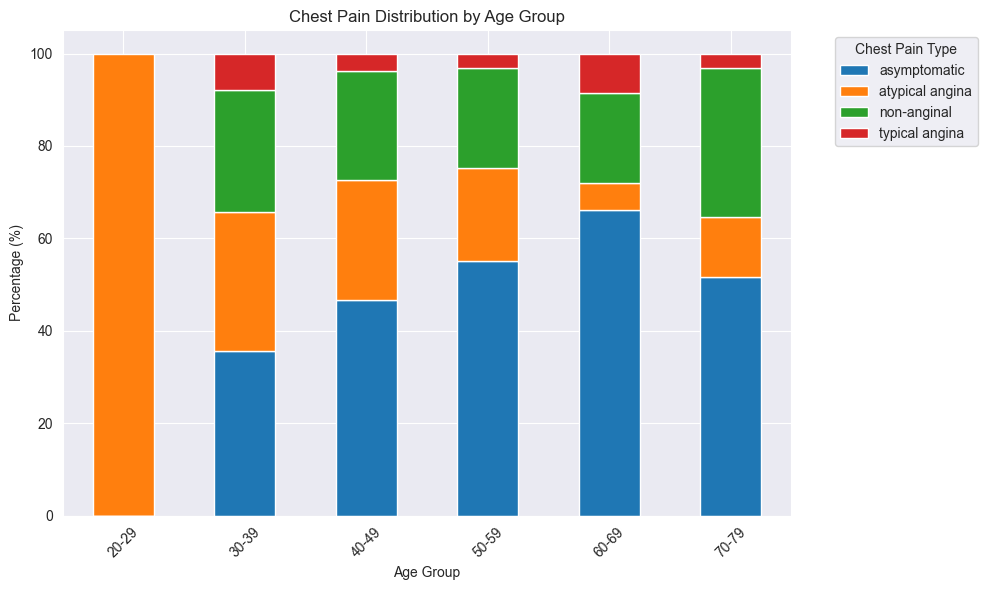

In [65]:
# Calculate total counts per age group for normalization
age_group_totals = df.groupby('age_bracket', observed=False).size().reset_index(name='total_count')

# Merge the total counts with the original data to calculate percentage
cp_age_group = df.groupby(['age_bracket', 'cp'], observed=False).size().reset_index(name='count')
cp_age_group = cp_age_group.merge(age_group_totals, on='age_bracket')
cp_age_group['percentage'] = cp_age_group['count'] / cp_age_group['total_count'] * 100

# Pivot the data for plotting
cp_pivot = cp_age_group.pivot(index='age_bracket', columns='cp', values='percentage')

# Plotting the stacked bar chart
cp_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the chart
plt.title('Chest Pain Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Chest Pain Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

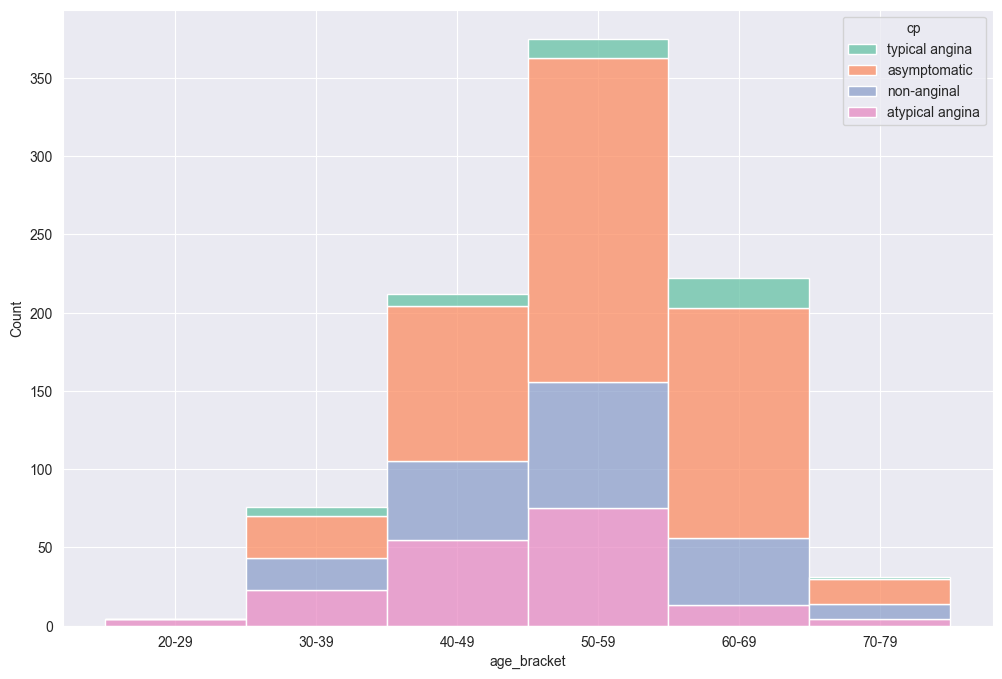

In [58]:
age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['age_bracket'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Create the stacked barchart
plt.figure(figsize=(12, 8))
hp = sns.histplot(data=df, x='age_bracket', hue='cp', multiple='stack', palette='Set2')

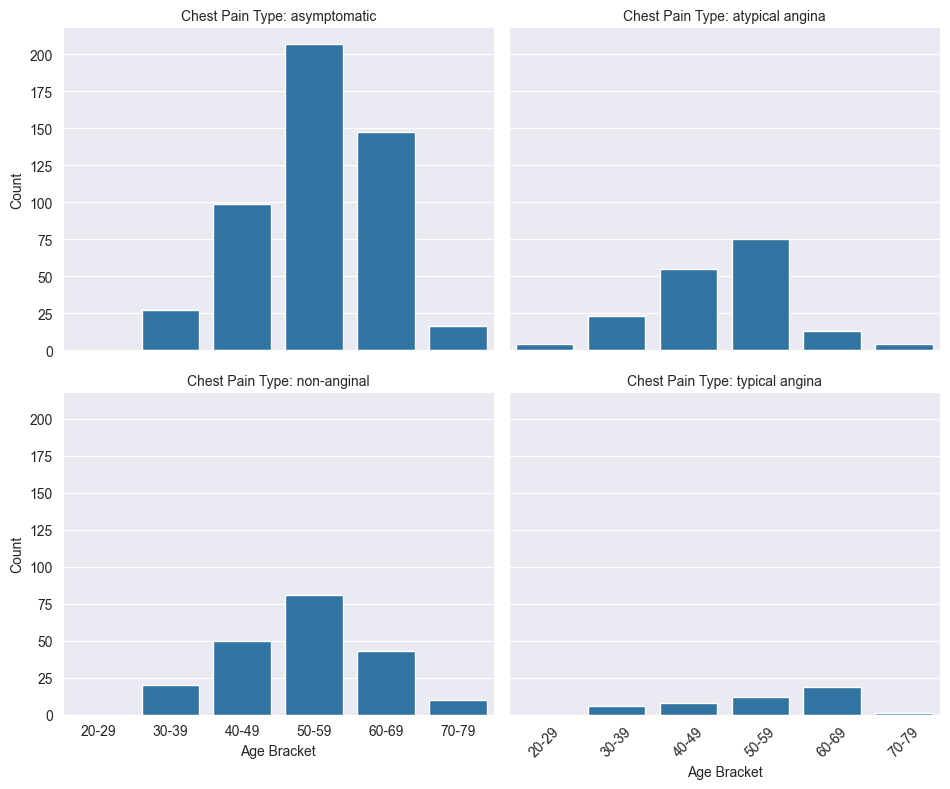

In [60]:
g = sns.FacetGrid(cp_age_group, col='cp', col_wrap=2, height=4, aspect=1.2)

# Use a barplot for each facet
g.map(sns.barplot, 'age_bracket', 'count', order=age_labels)

# Step 4: Set the axis labels, titles, and layout
g.set_axis_labels("Age Bracket", "Count")
g.set_titles("Chest Pain Type: {col_name}")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='cp', ylabel='count'>

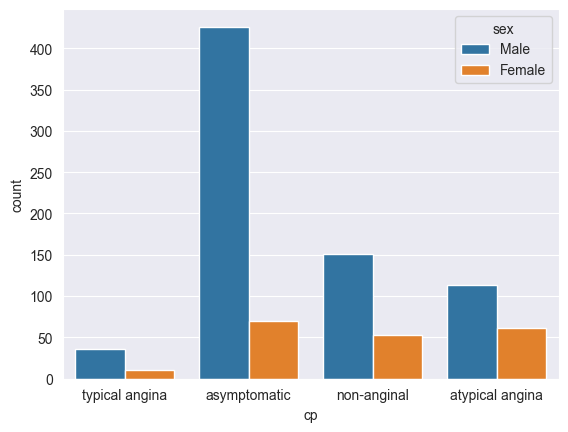

In [67]:
sns.countplot(df, x='cp', hue='sex')

Chest Pain Distribution by Sex (in percentage):
      sex               cp  percentage
0  Female     asymptomatic   36.082474
1  Female  atypical angina   31.443299
2  Female      non-anginal   27.319588
3  Female   typical angina    5.154639
4    Male     asymptomatic   58.677686
5    Male  atypical angina   15.564738
6    Male      non-anginal   20.798898
7    Male   typical angina    4.958678


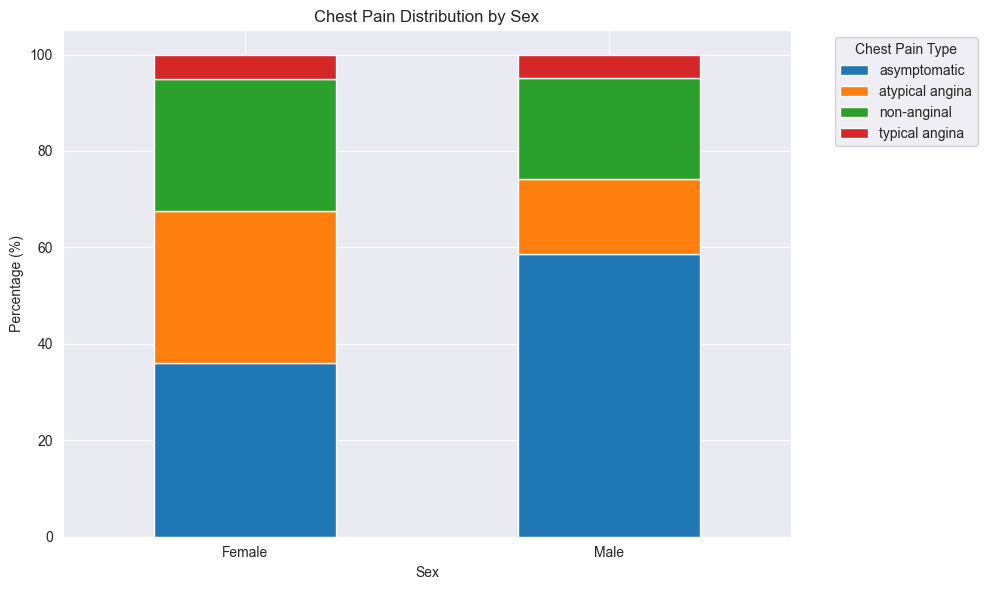

In [69]:
# Calculate total counts per sex for normalization
sex_totals = df.groupby('sex', observed=False).size().reset_index(name='total_count')

# Merge the total counts with the original data to calculate percentage
cp_sex_group = df.groupby(['sex', 'cp'], observed=False).size().reset_index(name='count')
cp_sex_group = cp_sex_group.merge(sex_totals, on='sex')
cp_sex_group['percentage'] = cp_sex_group['count'] / cp_sex_group['total_count'] * 100

# Print the actual percentages
print("Chest Pain Distribution by Sex (in percentage):")
print(cp_sex_group[['sex', 'cp', 'percentage']])

# Pivot the data for plotting
cp_sex_pivot = cp_sex_group.pivot(index='sex', columns='cp', values='percentage')

# Plotting the stacked bar chart
cp_sex_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the chart
plt.title('Chest Pain Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)  # No need to rotate the x-axis labels for sex
plt.legend(title='Chest Pain Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()